In [366]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd

In [367]:
import warnings
warnings.filterwarnings('ignore')

In [368]:
pd.set_option('display.max_columns', None)

In [369]:
import pandas as pd
df = pd.read_csv(r"C:\Users\FARMDAR\Desktop\Farmdar\Silage or Grain\Data\Silage and Grain\Bahawalnagar_Data_For_Script.csv")
df

,Row Labels,16-Jan,26-Jan,5-Feb,7-Mar,12-Mar,27-Mar,6-Apr,11-Apr,16-Apr,11-May,5-Jun,10-Jun,15-Jun,20-Jun,25-Jun,9-Aug,Sowing Date,Unnamed: 18
0,1,0.50,0.45,0.28,0.34,0.47,0.70,0.76,0.75,0.74,0.72,0.69,0.40,0.26,0.20,0.16,0.48,5th Feb to 7th Mar,NaN
1,2,0.72,0.65,0.57,0.20,0.25,0.27,0.35,0.40,0.42,0.74,0.81,0.66,0.49,0.69,0.51,0.43,7th Mar to 12th Mar,NaN
2,3,0.42,0.39,0.26,0.35,0.46,0.72,0.77,0.75,0.74,0.78,0.63,0.32,0.25,0.24,0.17,0.67,5th Feb to 7th Mar,NaN
3,4,0.42,0.44,0.37,0.41,0.51,0.74,0.71,0.66,0.65,0.64,0.71,0.54,0.21,0.26,0.20,0.22,5th Feb to 7th Mar,NaN
4,5,0.51,0.48,0.44,0.55,0.61,0.78,0.69,0.62,0.62,0.50,0.52,0.39,0.22,0.21,0.17,0.15,5th Feb to 7th Mar,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,11231,0.49,0.36,0.23,0.37,0.44,0.60,0.71,0.72,0.69,0.60,0.63,0.49,0.39,0.35,0.31,0.59,5th Feb to 7th Mar,NaN
11157,11233,0.73,0.65,0.58,0.49,0.48,0.52,0.62,0.58,0.53,0.66,0.81,0.72,0.56,0.67,0.63,0.78,12th Mar to 27th Mar,NaN
11158,11234,0.35,0.42,0.44,0.54,0.53,0.59,0.62,0.61,0.57,0.78,0.28,0.26,0.26,0.34,0.42,0.78,16th Jan to 26th Jan,NaN
11159,11239,0.29,0.25,0.22,0.41,0.45,0.72,0.74,0.76,0.71,0.69,0.64,0.39,0.28,0.33,0.36,0.58,5th Feb to 7th Mar,NaN


In [370]:
df['Sowing Date'].value_counts()

5th Feb to 7th Mar      5479
7th Mar to 12th Mar     2449
26th Jan to 5th Feb     1688
12th Mar to 27th Mar     580
27th Mar to 6th Apr      462
16th Jan to 26th Jan     408
6th Apr to 11th Apr       95
Name: Sowing Date, dtype: int64

In [371]:
def to_adder(sowing_date):
    
    date = sowing_date.split(' ')
    
    if len(date) == 4:
        date.insert(2, 'to')
        date = ' '.join(date)
        return date
    else:
        return sowing_date

 
df['Sowing Date'] = df['Sowing Date'].apply(to_adder)

df['Sowing Date'].value_counts()

5th Feb to 7th Mar      5479
7th Mar to 12th Mar     2449
26th Jan to 5th Feb     1688
12th Mar to 27th Mar     580
27th Mar to 6th Apr      462
16th Jan to 26th Jan     408
6th Apr to 11th Apr       95
Name: Sowing Date, dtype: int64

In [372]:
df.isna().sum()

Row Labels         0
16-Jan             2
26-Jan             0
5-Feb              4
7-Mar              0
12-Mar             4
27-Mar             4
6-Apr              4
11-Apr             4
16-Apr             4
11-May             4
5-Jun             71
10-Jun             4
15-Jun             4
20-Jun             4
25-Jun             4
9-Aug             98
Sowing Date        0
Unnamed: 18    11161
dtype: int64

In [373]:
df = df.drop('Unnamed: 18',axis = 1)
df

,Row Labels,16-Jan,26-Jan,5-Feb,7-Mar,12-Mar,27-Mar,6-Apr,11-Apr,16-Apr,11-May,5-Jun,10-Jun,15-Jun,20-Jun,25-Jun,9-Aug,Sowing Date
0,1,0.50,0.45,0.28,0.34,0.47,0.70,0.76,0.75,0.74,0.72,0.69,0.40,0.26,0.20,0.16,0.48,5th Feb to 7th Mar
1,2,0.72,0.65,0.57,0.20,0.25,0.27,0.35,0.40,0.42,0.74,0.81,0.66,0.49,0.69,0.51,0.43,7th Mar to 12th Mar
2,3,0.42,0.39,0.26,0.35,0.46,0.72,0.77,0.75,0.74,0.78,0.63,0.32,0.25,0.24,0.17,0.67,5th Feb to 7th Mar
3,4,0.42,0.44,0.37,0.41,0.51,0.74,0.71,0.66,0.65,0.64,0.71,0.54,0.21,0.26,0.20,0.22,5th Feb to 7th Mar
4,5,0.51,0.48,0.44,0.55,0.61,0.78,0.69,0.62,0.62,0.50,0.52,0.39,0.22,0.21,0.17,0.15,5th Feb to 7th Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,11231,0.49,0.36,0.23,0.37,0.44,0.60,0.71,0.72,0.69,0.60,0.63,0.49,0.39,0.35,0.31,0.59,5th Feb to 7th Mar
11157,11233,0.73,0.65,0.58,0.49,0.48,0.52,0.62,0.58,0.53,0.66,0.81,0.72,0.56,0.67,0.63,0.78,12th Mar to 27th Mar
11158,11234,0.35,0.42,0.44,0.54,0.53,0.59,0.62,0.61,0.57,0.78,0.28,0.26,0.26,0.34,0.42,0.78,16th Jan to 26th Jan
11159,11239,0.29,0.25,0.22,0.41,0.45,0.72,0.74,0.76,0.71,0.69,0.64,0.39,0.28,0.33,0.36,0.58,5th Feb to 7th Mar


In [374]:
df.dropna(axis=0, how='all', inplace=True)
df

,Row Labels,16-Jan,26-Jan,5-Feb,7-Mar,12-Mar,27-Mar,6-Apr,11-Apr,16-Apr,11-May,5-Jun,10-Jun,15-Jun,20-Jun,25-Jun,9-Aug,Sowing Date
0,1,0.50,0.45,0.28,0.34,0.47,0.70,0.76,0.75,0.74,0.72,0.69,0.40,0.26,0.20,0.16,0.48,5th Feb to 7th Mar
1,2,0.72,0.65,0.57,0.20,0.25,0.27,0.35,0.40,0.42,0.74,0.81,0.66,0.49,0.69,0.51,0.43,7th Mar to 12th Mar
2,3,0.42,0.39,0.26,0.35,0.46,0.72,0.77,0.75,0.74,0.78,0.63,0.32,0.25,0.24,0.17,0.67,5th Feb to 7th Mar
3,4,0.42,0.44,0.37,0.41,0.51,0.74,0.71,0.66,0.65,0.64,0.71,0.54,0.21,0.26,0.20,0.22,5th Feb to 7th Mar
4,5,0.51,0.48,0.44,0.55,0.61,0.78,0.69,0.62,0.62,0.50,0.52,0.39,0.22,0.21,0.17,0.15,5th Feb to 7th Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,11231,0.49,0.36,0.23,0.37,0.44,0.60,0.71,0.72,0.69,0.60,0.63,0.49,0.39,0.35,0.31,0.59,5th Feb to 7th Mar
11157,11233,0.73,0.65,0.58,0.49,0.48,0.52,0.62,0.58,0.53,0.66,0.81,0.72,0.56,0.67,0.63,0.78,12th Mar to 27th Mar
11158,11234,0.35,0.42,0.44,0.54,0.53,0.59,0.62,0.61,0.57,0.78,0.28,0.26,0.26,0.34,0.42,0.78,16th Jan to 26th Jan
11159,11239,0.29,0.25,0.22,0.41,0.45,0.72,0.74,0.76,0.71,0.69,0.64,0.39,0.28,0.33,0.36,0.58,5th Feb to 7th Mar


In [375]:
df.isna().sum()

Row Labels      0
16-Jan          2
26-Jan          0
5-Feb           4
7-Mar           0
12-Mar          4
27-Mar          4
6-Apr           4
11-Apr          4
16-Apr          4
11-May          4
5-Jun          71
10-Jun          4
15-Jun          4
20-Jun          4
25-Jun          4
9-Aug          98
Sowing Date     0
dtype: int64

In [376]:
columns_to_interpolate  = list(df.columns)

columns_to_exclude = ['Row Labels', 'Sowing Date']

columns_to_interpolate = [col for col in columns_to_interpolate if col not in columns_to_exclude]

interpolated_data = df[columns_to_interpolate].interpolate(axis=1).round(2)

interpolated_data = interpolated_data.bfill(axis=1)

df = pd.concat([df[columns_to_exclude], interpolated_data], axis=1)

sowing_date = df['Sowing Date']

df = df.drop(['Sowing Date'],axis = 1)

df['Sowing Date'] = sowing_date

df

,Row Labels,16-Jan,26-Jan,5-Feb,7-Mar,12-Mar,27-Mar,6-Apr,11-Apr,16-Apr,11-May,5-Jun,10-Jun,15-Jun,20-Jun,25-Jun,9-Aug,Sowing Date
0,1,0.50,0.45,0.28,0.34,0.47,0.70,0.76,0.75,0.74,0.72,0.69,0.40,0.26,0.20,0.16,0.48,5th Feb to 7th Mar
1,2,0.72,0.65,0.57,0.20,0.25,0.27,0.35,0.40,0.42,0.74,0.81,0.66,0.49,0.69,0.51,0.43,7th Mar to 12th Mar
2,3,0.42,0.39,0.26,0.35,0.46,0.72,0.77,0.75,0.74,0.78,0.63,0.32,0.25,0.24,0.17,0.67,5th Feb to 7th Mar
3,4,0.42,0.44,0.37,0.41,0.51,0.74,0.71,0.66,0.65,0.64,0.71,0.54,0.21,0.26,0.20,0.22,5th Feb to 7th Mar
4,5,0.51,0.48,0.44,0.55,0.61,0.78,0.69,0.62,0.62,0.50,0.52,0.39,0.22,0.21,0.17,0.15,5th Feb to 7th Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,11231,0.49,0.36,0.23,0.37,0.44,0.60,0.71,0.72,0.69,0.60,0.63,0.49,0.39,0.35,0.31,0.59,5th Feb to 7th Mar
11157,11233,0.73,0.65,0.58,0.49,0.48,0.52,0.62,0.58,0.53,0.66,0.81,0.72,0.56,0.67,0.63,0.78,12th Mar to 27th Mar
11158,11234,0.35,0.42,0.44,0.54,0.53,0.59,0.62,0.61,0.57,0.78,0.28,0.26,0.26,0.34,0.42,0.78,16th Jan to 26th Jan
11159,11239,0.29,0.25,0.22,0.41,0.45,0.72,0.74,0.76,0.71,0.69,0.64,0.39,0.28,0.33,0.36,0.58,5th Feb to 7th Mar


In [377]:
df.isna().sum()

Row Labels     0
16-Jan         0
26-Jan         0
5-Feb          0
7-Mar          0
12-Mar         0
27-Mar         0
6-Apr          0
11-Apr         0
16-Apr         0
11-May         0
5-Jun          0
10-Jun         0
15-Jun         0
20-Jun         0
25-Jun         0
9-Aug          0
Sowing Date    0
dtype: int64

In [378]:
# Renaming Sowing Date Columns

def rename_sowing_date(col_val):

    index_to = col_val.find("to")
    index_to = index_to + 3

    col_val = col_val[index_to:]
    
    col_val = col_val.replace(' ','-')
    col_val = col_val.replace('th','')
    col_val = col_val.strip('-')
    col_val = col_val.strip(' ')

    return col_val


def remove_space(text):
    return text.strip(' ')

def make_month_uppercase(sowing_date):
    words = sowing_date.split()
    
    for i in range(len(words)):
        if i == 1 or i == 4:
            word = words[i]
            word = word[0].upper() + word[1:]  # Capitalize the first letter
            words[i] = word
    
    return ' '.join(words)

      
            
            
        
        
    

df['Sowing Date'] = df['Sowing Date'].apply(make_month_uppercase)

df['Sowing Date'] = df['Sowing Date'].apply(remove_space)

sowing_date_og = df['Sowing Date']

df['Sowing Date'] = df['Sowing Date'].apply(rename_sowing_date)
df

,Row Labels,16-Jan,26-Jan,5-Feb,7-Mar,12-Mar,27-Mar,6-Apr,11-Apr,16-Apr,11-May,5-Jun,10-Jun,15-Jun,20-Jun,25-Jun,9-Aug,Sowing Date
0,1,0.50,0.45,0.28,0.34,0.47,0.70,0.76,0.75,0.74,0.72,0.69,0.40,0.26,0.20,0.16,0.48,7-Mar
1,2,0.72,0.65,0.57,0.20,0.25,0.27,0.35,0.40,0.42,0.74,0.81,0.66,0.49,0.69,0.51,0.43,12-Mar
2,3,0.42,0.39,0.26,0.35,0.46,0.72,0.77,0.75,0.74,0.78,0.63,0.32,0.25,0.24,0.17,0.67,7-Mar
3,4,0.42,0.44,0.37,0.41,0.51,0.74,0.71,0.66,0.65,0.64,0.71,0.54,0.21,0.26,0.20,0.22,7-Mar
4,5,0.51,0.48,0.44,0.55,0.61,0.78,0.69,0.62,0.62,0.50,0.52,0.39,0.22,0.21,0.17,0.15,7-Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,11231,0.49,0.36,0.23,0.37,0.44,0.60,0.71,0.72,0.69,0.60,0.63,0.49,0.39,0.35,0.31,0.59,7-Mar
11157,11233,0.73,0.65,0.58,0.49,0.48,0.52,0.62,0.58,0.53,0.66,0.81,0.72,0.56,0.67,0.63,0.78,27-Mar
11158,11234,0.35,0.42,0.44,0.54,0.53,0.59,0.62,0.61,0.57,0.78,0.28,0.26,0.26,0.34,0.42,0.78,26-Jan
11159,11239,0.29,0.25,0.22,0.41,0.45,0.72,0.74,0.76,0.71,0.69,0.64,0.39,0.28,0.33,0.36,0.58,7-Mar


In [379]:
df['Sowing Date'].value_counts()

7-Mar     5479
12-Mar    2449
5-Feb     1688
27-Mar     580
6-Apr      462
26-Jan     408
11-Apr      95
Name: Sowing Date, dtype: int64

In [380]:
# making dictonary of columns:

cols = list(df.columns)

cols = cols[1:-1]
cols

cols_dict = dict(zip(cols,range(len(cols))))


cols_dict

{'16-Jan': 0,
 '26-Jan': 1,
 '5-Feb': 2,
 '7-Mar': 3,
 '12-Mar': 4,
 '27-Mar': 5,
 '6-Apr': 6,
 '11-Apr': 7,
 '16-Apr': 8,
 '11-May': 9,
 '5-Jun': 10,
 '10-Jun': 11,
 '15-Jun': 12,
 '20-Jun': 13,
 '25-Jun': 14,
 '9-Aug': 15}

In [381]:
df['Sowing Date']

0         7-Mar
1        12-Mar
2         7-Mar
3         7-Mar
4         7-Mar
          ...  
11156     7-Mar
11157    27-Mar
11158    26-Jan
11159     7-Mar
11160     7-Mar
Name: Sowing Date, Length: 11161, dtype: object

In [382]:
arr = []

Crop_NDVI = []

def Crop_NDVI_Threshold(num):


    for row_index in range(len(df)):

        row = df.iloc[row_index].tolist()

        row = row[1:-4]

        ans = "Grain"

        diff = 0

        for i in range(5,len(row)):

            if i != (len(row) - 1):

                next_ = row[i + 1]
                prev_ = row[i]

                diff = (next_ / prev_) - 1

                if diff < - num:

                    if i != (len(row) - 2):

                        if row[i + 2] <= next_:

                            ans = "Silage"
                            break
                        else:

                            if  (row[i + 2] / next_ ) <= 1.07 :
                                ans = "Silage"
                            else:
                                continue

                    else:
                        ans = "Silage"
                        break

                elif diff >= - num:
                    ans = "Grain"
                    
        Crop_NDVI.append(ans)
        
    df['Crop_NDVI'] = Crop_NDVI
        
        
        
df['Sowing Date'] = sowing_date_og

In [383]:

def get_middle_date(a):
    
    from datetime import datetime, timedelta
    
    current_year = 2023
    
    # Extract dates
    dates = a.split('to')
    
    dates[0] = dates[0].strip(' ')
    
    try:
        dates[1] = dates[1].strip(' ')
    except:
        print(a)
        
    
    
    start_date = dates[0].replace('th', '').replace('st', '').replace('nd', '').replace('rd', '')
    end_date = dates[1].replace('th', '').replace('st', '').replace('nd', '').replace('rd', '')

    # Convert to datetime objects
    start_date_obj = datetime.strptime(start_date, '%d %b')
    end_date_obj = datetime.strptime(end_date, '%d %b')

    # Calculate middle date
    middle_date_obj = start_date_obj + (end_date_obj - start_date_obj) / 2
    
    #middle_date_obj = end_date_obj
    
    current_year_date = middle_date_obj.replace(year=current_year)


    return current_year_date

df['Middle Sowing Date'] = df['Sowing Date'].apply(get_middle_date)

df

,Row Labels,16-Jan,26-Jan,5-Feb,7-Mar,12-Mar,27-Mar,6-Apr,11-Apr,16-Apr,11-May,5-Jun,10-Jun,15-Jun,20-Jun,25-Jun,9-Aug,Sowing Date,Middle Sowing Date
0,1,0.50,0.45,0.28,0.34,0.47,0.70,0.76,0.75,0.74,0.72,0.69,0.40,0.26,0.20,0.16,0.48,5th Feb to 7th Mar,2023-02-20 00:00:00
1,2,0.72,0.65,0.57,0.20,0.25,0.27,0.35,0.40,0.42,0.74,0.81,0.66,0.49,0.69,0.51,0.43,7th Mar to 12th Mar,2023-03-09 12:00:00
2,3,0.42,0.39,0.26,0.35,0.46,0.72,0.77,0.75,0.74,0.78,0.63,0.32,0.25,0.24,0.17,0.67,5th Feb to 7th Mar,2023-02-20 00:00:00
3,4,0.42,0.44,0.37,0.41,0.51,0.74,0.71,0.66,0.65,0.64,0.71,0.54,0.21,0.26,0.20,0.22,5th Feb to 7th Mar,2023-02-20 00:00:00
4,5,0.51,0.48,0.44,0.55,0.61,0.78,0.69,0.62,0.62,0.50,0.52,0.39,0.22,0.21,0.17,0.15,5th Feb to 7th Mar,2023-02-20 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,11231,0.49,0.36,0.23,0.37,0.44,0.60,0.71,0.72,0.69,0.60,0.63,0.49,0.39,0.35,0.31,0.59,5th Feb to 7th Mar,2023-02-20 00:00:00
11157,11233,0.73,0.65,0.58,0.49,0.48,0.52,0.62,0.58,0.53,0.66,0.81,0.72,0.56,0.67,0.63,0.78,12th Mar to 27th Mar,2023-03-19 12:00:00
11158,11234,0.35,0.42,0.44,0.54,0.53,0.59,0.62,0.61,0.57,0.78,0.28,0.26,0.26,0.34,0.42,0.78,16th Jan to 26th Jan,2023-01-21 00:00:00
11159,11239,0.29,0.25,0.22,0.41,0.45,0.72,0.74,0.76,0.71,0.69,0.64,0.39,0.28,0.33,0.36,0.58,5th Feb to 7th Mar,2023-02-20 00:00:00


In [384]:
df['Middle Sowing Date']

0       2023-02-20 00:00:00
1       2023-03-09 12:00:00
2       2023-02-20 00:00:00
3       2023-02-20 00:00:00
4       2023-02-20 00:00:00
                ...        
11156   2023-02-20 00:00:00
11157   2023-03-19 12:00:00
11158   2023-01-21 00:00:00
11159   2023-02-20 00:00:00
11160   2023-02-20 00:00:00
Name: Middle Sowing Date, Length: 11161, dtype: datetime64[ns]

In [385]:
cols = list(df.columns)

cols = cols[1:-2]
cols

from datetime import datetime

current_year = datetime.now().year

for i in range(len(cols)):
    cols[i]= datetime.strptime(f'{cols[i]}-{current_year}', '%d-%b-%Y')
    cols[i] = cols[i].date()
    
cols_dict2 = dict(zip(range(len(cols)),cols))
cols_dict2

{0: datetime.date(2023, 1, 16),
 1: datetime.date(2023, 1, 26),
 2: datetime.date(2023, 2, 5),
 3: datetime.date(2023, 3, 7),
 4: datetime.date(2023, 3, 12),
 5: datetime.date(2023, 3, 27),
 6: datetime.date(2023, 4, 6),
 7: datetime.date(2023, 4, 11),
 8: datetime.date(2023, 4, 16),
 9: datetime.date(2023, 5, 11),
 10: datetime.date(2023, 6, 5),
 11: datetime.date(2023, 6, 10),
 12: datetime.date(2023, 6, 15),
 13: datetime.date(2023, 6, 20),
 14: datetime.date(2023, 6, 25),
 15: datetime.date(2023, 8, 9)}

In [386]:
from datetime import datetime

harvestdate = []

def calculate_harvesting_period(arr, middle_sowing_date,row_index):
    
    date_index = None  
    
    for i in range(5,len(arr)):
        if arr[i] <= 0.35:
            date_index = i
            break  
            
    if date_index is None:
        return None
    
    
    harvest_date = cols_dict2[date_index]
    
    
    harvestdate.append(harvest_date)
    
    duration =  harvest_date - middle_sowing_date
    
    return duration

def timestamp_to_datetime(timestamp):
    
    from datetime import datetime
    
    date_obj = timestamp.date()

    return date_obj

df['Middle Sowing Date'] = df['Middle Sowing Date'].apply(timestamp_to_datetime)
df

,Row Labels,16-Jan,26-Jan,5-Feb,7-Mar,12-Mar,27-Mar,6-Apr,11-Apr,16-Apr,11-May,5-Jun,10-Jun,15-Jun,20-Jun,25-Jun,9-Aug,Sowing Date,Middle Sowing Date
0,1,0.50,0.45,0.28,0.34,0.47,0.70,0.76,0.75,0.74,0.72,0.69,0.40,0.26,0.20,0.16,0.48,5th Feb to 7th Mar,2023-02-20
1,2,0.72,0.65,0.57,0.20,0.25,0.27,0.35,0.40,0.42,0.74,0.81,0.66,0.49,0.69,0.51,0.43,7th Mar to 12th Mar,2023-03-09
2,3,0.42,0.39,0.26,0.35,0.46,0.72,0.77,0.75,0.74,0.78,0.63,0.32,0.25,0.24,0.17,0.67,5th Feb to 7th Mar,2023-02-20
3,4,0.42,0.44,0.37,0.41,0.51,0.74,0.71,0.66,0.65,0.64,0.71,0.54,0.21,0.26,0.20,0.22,5th Feb to 7th Mar,2023-02-20
4,5,0.51,0.48,0.44,0.55,0.61,0.78,0.69,0.62,0.62,0.50,0.52,0.39,0.22,0.21,0.17,0.15,5th Feb to 7th Mar,2023-02-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,11231,0.49,0.36,0.23,0.37,0.44,0.60,0.71,0.72,0.69,0.60,0.63,0.49,0.39,0.35,0.31,0.59,5th Feb to 7th Mar,2023-02-20
11157,11233,0.73,0.65,0.58,0.49,0.48,0.52,0.62,0.58,0.53,0.66,0.81,0.72,0.56,0.67,0.63,0.78,12th Mar to 27th Mar,2023-03-19
11158,11234,0.35,0.42,0.44,0.54,0.53,0.59,0.62,0.61,0.57,0.78,0.28,0.26,0.26,0.34,0.42,0.78,16th Jan to 26th Jan,2023-01-21
11159,11239,0.29,0.25,0.22,0.41,0.45,0.72,0.74,0.76,0.71,0.69,0.64,0.39,0.28,0.33,0.36,0.58,5th Feb to 7th Mar,2023-02-20


In [387]:
df.columns

Index(['Row Labels', '16-Jan', '26-Jan', '5-Feb', '7-Mar', '12-Mar', '27-Mar',
       '6-Apr', '11-Apr', '16-Apr', '11-May', '5-Jun', '10-Jun', '15-Jun',
       '20-Jun', '25-Jun', '9-Aug', 'Sowing Date', 'Middle Sowing Date'],
      dtype='object')

In [388]:
period = []

for row_index in range(len(df)):

    arr2 = df.iloc[row_index].tolist()
    
    
    mid = arr2[-1]
    
    arr2 = arr2[1:-2]
    

    
    
    period.append(calculate_harvesting_period(arr2,mid,row_index))
    

    


In [389]:



def Crop_Harvest_Threshold(num):
    df['Harvesting Period'] = period
    
    df['Middle Sowing Date'] = pd.to_datetime(df['Middle Sowing Date'])
    df['Harvesting Period'] = pd.to_timedelta(df['Harvesting Period'], unit='D')
    df['Harvest Date'] = df['Middle Sowing Date'] + df['Harvesting Period']
    df['Harvesting Period'] = df['Harvesting Period'].dt.days
    
    
    
    df['Crop_Harvest'] = df['Harvesting Period'].apply(lambda x: 'Silage' if num >= x  else 'Grain')

df.to_csv('out.csv')


In [390]:
def plot_Avg_Crop_NDVI():
    grain = df[df['Crop_NDVI'] == 'Grain']
    grain = grain.mean()
    grain

    sil = df[df['Crop_NDVI'] == 'Silage']
    sil = sil.mean()
    
    grain = grain[1:-1]
    sil = sil[1:-1]

    plt.figure(figsize=(10,5))


    plt.title('Crop_NDVI')
    plt.ylabel('NDVI')
    plt.plot(grain, label = 'Grain')
    plt.plot(sil, label = 'Silage')
    plt.legend()

In [391]:
def plot_Avg_Crop_Harvest():
    grain = df[df['Crop_Harvest'] == 'Grain']
    grain = grain.mean()
    grain
    
    
    
    

    sil = df[df['Crop_Harvest'] == 'Silage']
    sil = sil.mean()

    grain = grain[1:-1]
    sil = sil[1:-1]




    plt.figure(figsize=(10,5))


    plt.title('Crop_Harvest')
    plt.ylabel('NDVI')
    plt.plot(grain, label = 'Grain')
    plt.plot(sil, label = 'Silage')
    plt.legend()

In [392]:
def stats_crop_harvest():
    stats = df['Crop_Harvest'].value_counts()
    stats['Total'] = stats['Silage'] + stats['Grain']
    stats['Silage Percentage'] = (stats['Silage'] / stats['Total'] ) * 100
    stats['Grain Percentage'] = 100 - stats['Silage Percentage']

    stats = stats.round(1)

    stats['Silage Percentage'] = str(stats['Silage Percentage']) + '%'
    stats['Grain Percentage'] = str(stats['Grain Percentage']) + '%'

    return stats

In [393]:
Crop_NDVI_Threshold(0.50)

df

,Row Labels,16-Jan,26-Jan,5-Feb,7-Mar,12-Mar,27-Mar,6-Apr,11-Apr,16-Apr,11-May,5-Jun,10-Jun,15-Jun,20-Jun,25-Jun,9-Aug,Sowing Date,Middle Sowing Date,Crop_NDVI
0,1,0.50,0.45,0.28,0.34,0.47,0.70,0.76,0.75,0.74,0.72,0.69,0.40,0.26,0.20,0.16,0.48,5th Feb to 7th Mar,2023-02-20,Grain
1,2,0.72,0.65,0.57,0.20,0.25,0.27,0.35,0.40,0.42,0.74,0.81,0.66,0.49,0.69,0.51,0.43,7th Mar to 12th Mar,2023-03-09,Grain
2,3,0.42,0.39,0.26,0.35,0.46,0.72,0.77,0.75,0.74,0.78,0.63,0.32,0.25,0.24,0.17,0.67,5th Feb to 7th Mar,2023-02-20,Grain
3,4,0.42,0.44,0.37,0.41,0.51,0.74,0.71,0.66,0.65,0.64,0.71,0.54,0.21,0.26,0.20,0.22,5th Feb to 7th Mar,2023-02-20,Grain
4,5,0.51,0.48,0.44,0.55,0.61,0.78,0.69,0.62,0.62,0.50,0.52,0.39,0.22,0.21,0.17,0.15,5th Feb to 7th Mar,2023-02-20,Grain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,11231,0.49,0.36,0.23,0.37,0.44,0.60,0.71,0.72,0.69,0.60,0.63,0.49,0.39,0.35,0.31,0.59,5th Feb to 7th Mar,2023-02-20,Grain
11157,11233,0.73,0.65,0.58,0.49,0.48,0.52,0.62,0.58,0.53,0.66,0.81,0.72,0.56,0.67,0.63,0.78,12th Mar to 27th Mar,2023-03-19,Grain
11158,11234,0.35,0.42,0.44,0.54,0.53,0.59,0.62,0.61,0.57,0.78,0.28,0.26,0.26,0.34,0.42,0.78,16th Jan to 26th Jan,2023-01-21,Silage
11159,11239,0.29,0.25,0.22,0.41,0.45,0.72,0.74,0.76,0.71,0.69,0.64,0.39,0.28,0.33,0.36,0.58,5th Feb to 7th Mar,2023-02-20,Grain


In [394]:
Crop_Harvest_Threshold(90)
#plot_Avg_Crop_NDVI()

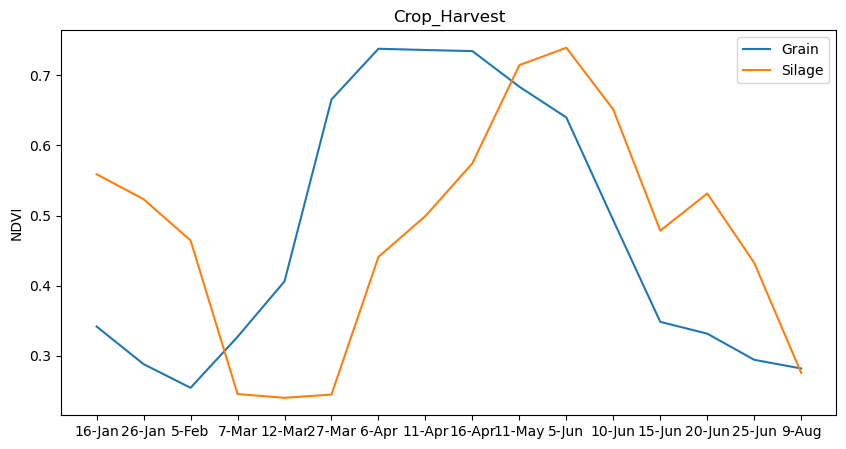

In [395]:
plot_Avg_Crop_Harvest()

In [396]:
stats_crop_harvest()

Grain                 9426.0
Silage                1735.0
Total                11161.0
Silage Percentage      15.5%
Grain Percentage       84.5%
Name: Crop_Harvest, dtype: object

In [397]:
df['Crop_NDVI'].value_counts()


Grain     9960
Silage    1201
Name: Crop_NDVI, dtype: int64

In [398]:
df.to_csv('bhawalnagar_90_days_0.5.csv')